## Importer le dataframe

In [65]:
import   numpy as np 
import pandas as pd

from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns 


##  diviser mon dataset pour les entrainé et testé 
from sklearn.model_selection import train_test_split


## pour le model 
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import LogisticRegression  # Régression Logistique
from sklearn.cluster import KMeans  # Clustering K-Means
from sklearn.tree import DecisionTreeClassifier  # Arbre de Décision Classificateur
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.metrics import accuracy_score

import joblib

In [66]:
df = pd .read_csv("D:/ProjetPerso/CreditScoreIA_Banque/IA_Banque/Data/banque.csv")

In [67]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
print("ligne_colonne:" , df.shape ,"    " , "le nombre d'element" , df.size  )

ligne_colonne: (614, 13)      le nombre d'element 7982


## Analyser le dataframe

In [69]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [71]:
## verfier les données manquantes

df.isnull().sum().sort_values(ascending=False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
# Loan_ID - Identifiant du prêt
# Gender - Genre
# Married - Marié(e)
# Dependents - Personnes à charge
# Education - Éducation
# Self_Employed - Travailleur indépendant
# ApplicantIncome - Revenu du demandeur
# CoapplicantIncome - Revenu du co-demandeur
# LoanAmount - Montant du prêt
# Loan_Amount_Term - Durée du prêt
# Credit_History - Historique de crédit
# Property_Area - Zone de propriété
# Loan_Status - Statut du prêt

In [73]:
##Description des veleur numerique
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [74]:
##Description des valeur string
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Traitement du dataframe

In [75]:
df.dtypes   

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [76]:
## traiter les valeurs maquantes  
cat_df = []
num_df = []


for i , c in enumerate(df.dtypes):
    if c == "object":
        cat_df.append(df.iloc[ : , i ])
    else :
        num_df.append(df.iloc[ : , i ])     
        
cat_df = pd.DataFrame(cat_df).transpose()
num_df = pd.DataFrame(num_df).transpose()       

In [77]:
#remplacer la valeur la plus frequents pour les données categoriales


cat_df = cat_df.apply(lambda x : x.fillna(x.value_counts().index[0]) )
 
cat_df.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [78]:
#remplacer les valeus numerique  manquante par les valeurs  qui lui précede 


num_df.fillna(method='bfill' , inplace=True)


num_df.isnull().sum()


C:\Users\mamou\AppData\Local\Temp\ipykernel_15492\3719400379.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_df.fillna(method='bfill' , inplace=True)


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [79]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [80]:
## Transformer les valeurs categoriales en numerque 

for i in cat_df : 
    cat_df[i] = LabelEncoder().fit_transform(cat_df[i])


cat_df.drop("Loan_ID" , axis=1 , inplace=True) 

In [81]:
## Contaner cat_df et num_df
df_clean = pd.concat([cat_df , num_df] , axis=1)


In [82]:
## Comprendre notre variable cible 

df_clean['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

le pourcentage de credit accorde est : 0.3127035830618892
le pourcentage de credit  non accorde est : 0.6872964169381107


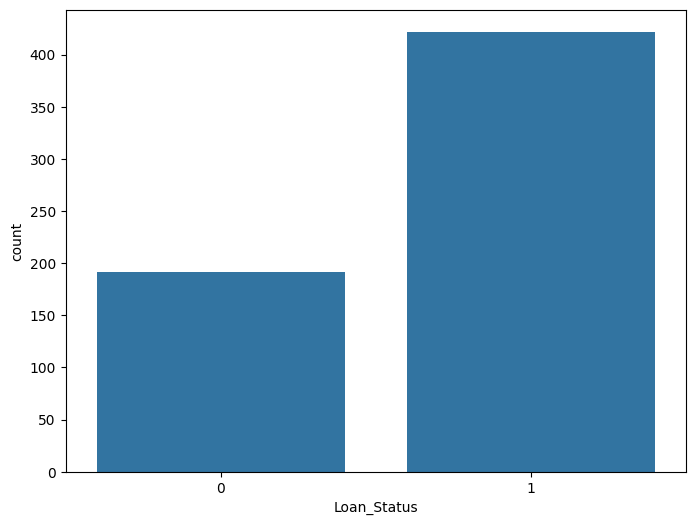

In [83]:
## regarder notre variable cible 
val_cible = df_clean["Loan_Status"]

plt.figure(figsize=(8,6))

sns.countplot(x= val_cible)
yes = val_cible.value_counts()[0]/len(val_cible)

no = val_cible.value_counts()[1]/len(val_cible)



print(f'le pourcentage de credit accorde est : {yes}')
print(f'le pourcentage de credit  non accorde est : {no}')


d:\ProjetPerso\CreditScoreIA_Banque\envBanque_IA\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


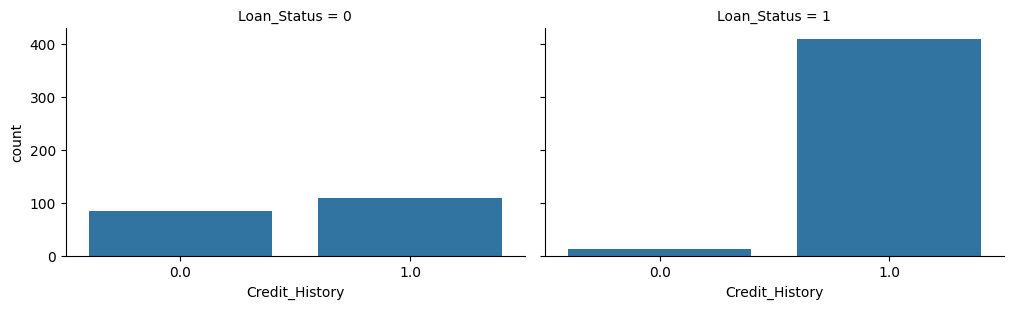

In [84]:
grid = sns.FacetGrid(df_clean , col='Loan_Status' , height=3.2 , aspect=1.6)

grid.map(sns.countplot , 'Credit_History')

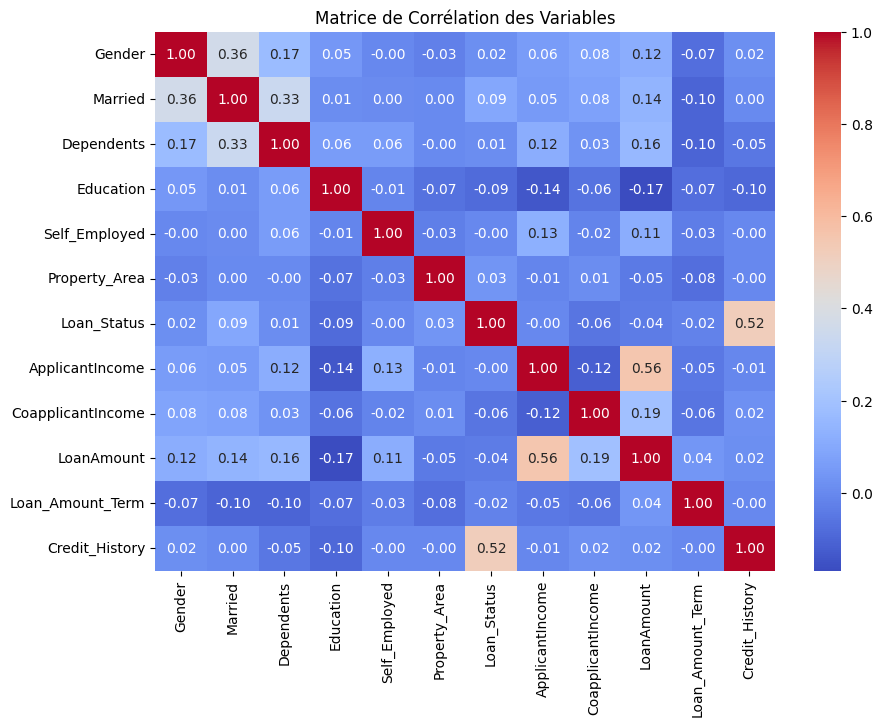

In [85]:
# Calculer la matrice de corrélation
correlation_matrix = df_clean.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation des Variables')
plt.show()

In [86]:
df_clean.groupby("Loan_Status").median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [87]:
df_clean.columns.tolist()


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Divise mon Dataframe

In [88]:
x= df_clean[["Credit_History" , "Married" , "CoapplicantIncome"]]
y = df_clean["Loan_Status"]



x_train , x_test , y_train , y_test =  train_test_split(x , y , test_size=0.2, random_state=0)

## choisir  un   model

In [89]:
## on vas appliquez 3 algorithme  Logistic regression , KMN , DecisionTree

# Créer et entraîner le modèle
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Prédire et évaluer
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy de la Régression Logistique : {accuracy:.2f}")


Accuracy de la Régression Logistique : 0.85


In [90]:
# # Créer et entraîner le modèle
# tree_model = DecisionTreeClassifier(random_state=42)
# tree_model.fit(x_train, y_train)

# # Prédire et évaluer
# y_pred_tree = tree_model.predict(x_test)
# accuracy_tree = accuracy_score(y_test, y_pred_tree)
# print(f"Accuracy de l'Arbre de Décision : {accuracy_tree:.2f}")

In [91]:
# # Créer et entraîner le modèle KNN
# knn_model = KNeighborsClassifier(n_neighbors=3)  # Définir k=3
# knn_model.fit(x_train, y_train)

# # Prédire et évaluer
# y_pred_knn = knn_model.predict(x_test)
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# print(f"Accuracy du KNN : {accuracy_knn:.2f}")

In [92]:
# Enregistrer le modèle entraîné
joblib.dump(logistic_model, 'D:/ProjetPerso/CreditScoreIA_Banque/App/model.pkl')

['D:/ProjetPerso/CreditScoreIA_Banque/App/model.pkl']

## Prediction du model